In [86]:
import torch

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
data = pd.read_csv('./data/income1.csv')

In [89]:
data

,Unnamed: 0,Education,Income
0,1,10.000000,26.658839
1,2,10.401338,27.306435
2,3,10.842809,22.132410
3,4,11.244147,21.169841
4,5,11.645485,15.192634
5,6,12.086957,26.398951
6,7,12.488294,17.435307
7,8,12.889632,25.507885
8,9,13.290970,36.884595
9,10,13.732441,39.666109


Text(0, 0.5, 'Income')

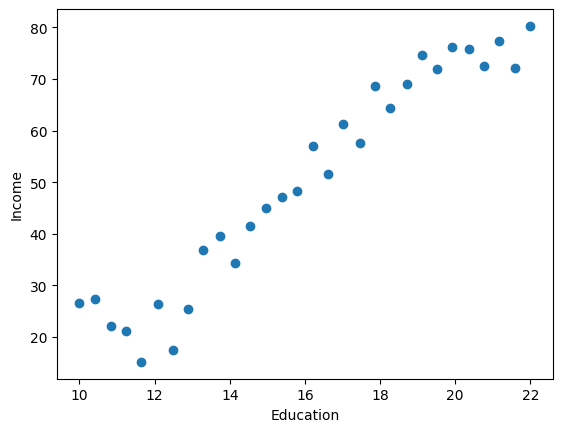

In [90]:
plt.scatter(data.Education, data.Income)
plt.xlabel('Education')
plt.ylabel('Income')

In [133]:
# create y = wx + b
#initialize weights
w = torch.randn(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

In [134]:
w.detach().numpy()

array([0.84766334], dtype=float32)

In [135]:
w.data

tensor([0.8477])

In [136]:
#learning rate
ls = 0.001

In [137]:
#create tensor dataset
X = torch.from_numpy(data.Education.values.reshape(-1,1)).type(torch.FloatTensor)
#Reshapes the array into a 2D column vector. 
#The -1 automatically infers the number of rows based on the data’s length.
y = torch.from_numpy(data.Income.values.reshape(-1,1)).type(torch.FloatTensor)

In [138]:
X.data

tensor([[10.0000],
        [10.4013],
        [10.8428],
        [11.2441],
        [11.6455],
        [12.0870],
        [12.4883],
        [12.8896],
        [13.2910],
        [13.7324],
        [14.1338],
        [14.5351],
        [14.9766],
        [15.3779],
        [15.7793],
        [16.2207],
        [16.6221],
        [17.0234],
        [17.4649],
        [17.8662],
        [18.2676],
        [18.7090],
        [19.1104],
        [19.5117],
        [19.9130],
        [20.3545],
        [20.7559],
        [21.1572],
        [21.5987],
        [22.0000]])

In [147]:
#define the training process
for epoch in range(5000):
    # in pytorch, the grad will accumulate if you keep differetiate
    if w.grad is not None:
        # w.grad.data.zero_()
        w.grad.zero_()

    if b.grad is not None:
        # b.grad.data.zero_()
        b.grad.zero_()

    y_pred = X * w + b
    loss = ((y-y_pred)**2).mean()

    #backprapagation
    loss.backward()

    #update w,b
    with torch.no_grad():
        w-=w.grad*ls
        b-=b.grad*ls
        # w.data-=w.grad.data*ls
        # b.data-=b.grad.data*ls
    

In [148]:
w

tensor([4.2538], requires_grad=True)

In [149]:
b

tensor([-16.8395], requires_grad=True)

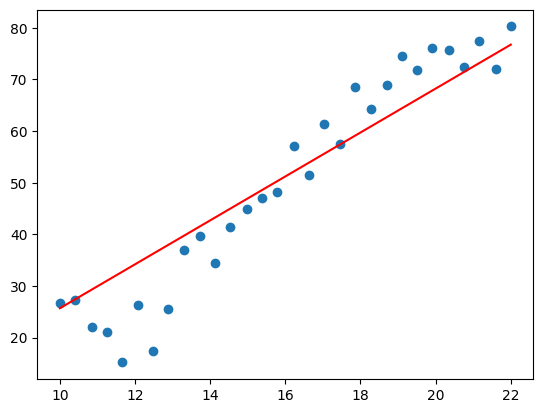

In [150]:
plt.scatter(data.Education, data.Income)
plt.plot(X.numpy(), (X*w+b).data.numpy(),c='r')